In [2]:
!pip install ydata-profiling 
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("EV-data.csv")
profile = ProfileReport(df, title="report")
profile.to_notebook_iframe()
profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import pandas as pd
df = pd.read_csv('EV-data.csv')
numerical_cols = df.select_dtypes(include=['number'])
median_values = numerical_cols.median()
std_dev_values = numerical_cols.std()
print("Median of numerical columns:\n", median_values)
print("\nStandard Deviation of numerical columns:\n", std_dev_values)

Median of numerical columns:
 year     2018.0
value     190.0
dtype: float64

Standard Deviation of numerical columns:
 year          3.809226
value    818440.248406
dtype: float64


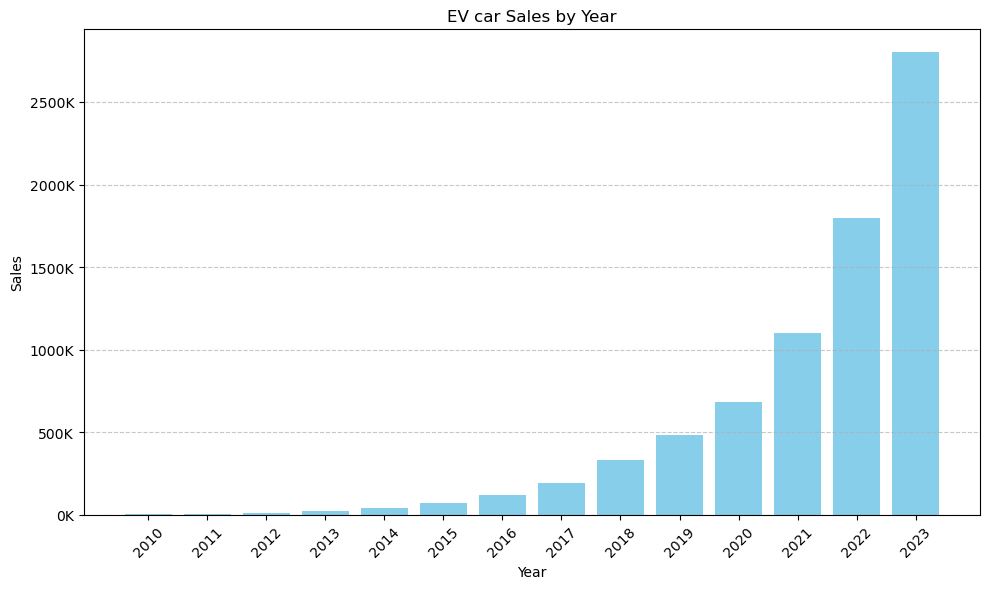

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
df = pd.read_csv('EV-data.csv')
df_total_sales = df[(df['region'] == 'World') & (df['unit'] == 'Vehicles')]
plt.figure(figsize=(10, 6))
plt.bar(df_total_sales['year'], df_total_sales['value'], color='skyblue')
plt.title('EV car Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
def thousands_formatter(x, pos):return f'{int(x/10000)}K'
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xticks(df['year'].unique(), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

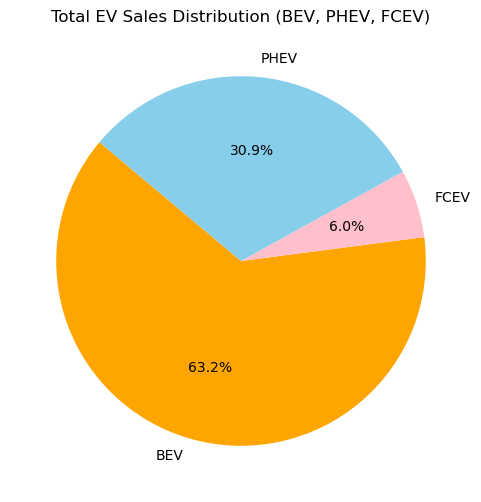

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("EV-data.csv")
ev_sales_df = df[(df["parameter"] == "EV sales") & (df["powertrain"].isin(["BEV", "PHEV", "FCEV"]))]
total_sales = ev_sales_df.groupby("powertrain")["value"].sum()
total_sales["FCEV"] *= 45
plt.figure(figsize=(6, 6))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'pink', 'skyblue'])
plt.title("Total EV Sales Distribution (BEV, PHEV, FCEV)")
plt.show()

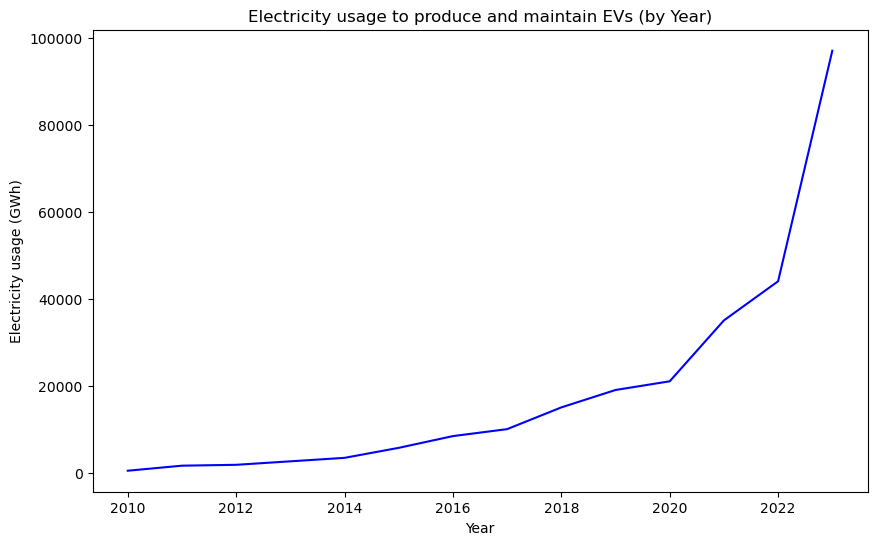

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('EV-data.csv')
df_total_usage = df[(df['region'] == 'World') & (df['parameter'] == 'Electricity demand')]
plt.figure(figsize=(10, 6))
plt.plot(df_total_usage['year'], df_total_usage['value'], label='line', color='blue')
plt.title('Electricity usage to produce and maintain EVs (by Year)')
plt.xlabel('Year')
plt.ylabel('Electricity usage (GWh)')
plt.show()

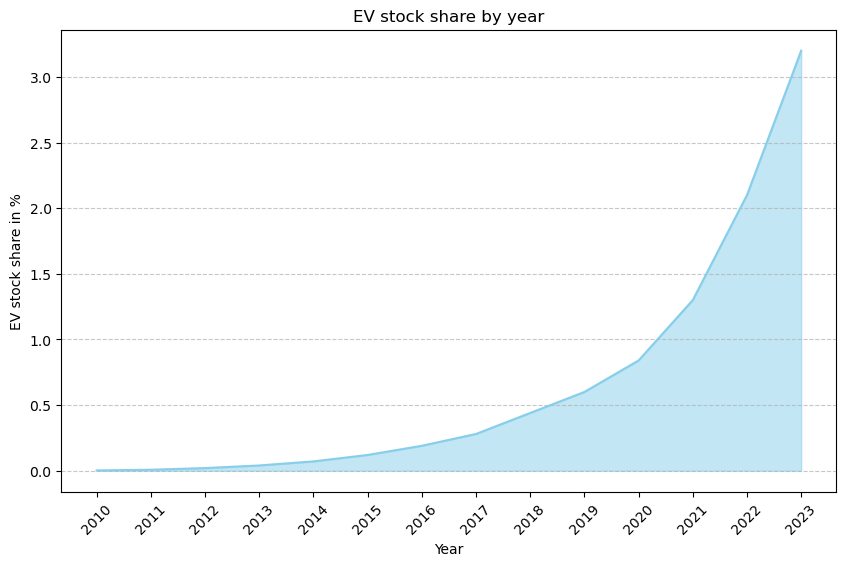

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
df = pd.read_csv('EV-data.csv')
df_stock = df[(df['region'] == 'World') & (df['parameter'] == 'EV stock share')]
plt.figure(figsize=(10, 6))
plt.plot(df_stock['year'], df_stock['value'], color='skyblue')
plt.fill_between(df_stock['year'], df_stock['value'], color='skyblue', alpha=0.5)
plt.title('EV stock share by year')
plt.xlabel('Year')
plt.ylabel('EV stock share in %')
plt.xticks(df['year'].unique(), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

df = pd.read_csv("EV-data.csv")

app = JupyterDash(__name__)

dropdown_options = [
    {"label": "Sales", "value": "sales"},
    {"label": "EV Sales Distribution", "value": "distribution"},
    {"label": "Electricity usage", "value": "electricity"},
    {"label": "Stocks", "value": "stock"},
]

app.layout = html.Div([
    html.H1("EV Dashboard", style={"textAlign": "center", "fontSize": "24px"}),
    
    dcc.Dropdown(
        id="graph-dropdown",
        options=dropdown_options,
        value="sales", 
        clearable=False,
        style={"width": "60%", "margin": "auto"}
    ),
    
    dcc.Graph(id="graph-output")
])

@app.callback(
    Output("graph-output", "figure"),
    Input("graph-dropdown", "value")
)
def update_graph(selected_graph):
    if selected_graph == "sales":
        df_total_sales = df[(df['region'] == 'World') & (df['unit'] == 'Vehicles')]
        fig = px.bar(df_total_sales, x="year", y="value", 
                     title="EV Car Sales by Year", labels={"value": "Sales", "year": "Year"},
                     color_discrete_sequence=["skyblue"])
    
    elif selected_graph == "distribution":
        ev_sales_df = df[(df["parameter"] == "EV sales") & (df["powertrain"].isin(["BEV", "PHEV", "FCEV"]))]
        total_sales = ev_sales_df.groupby("powertrain")["value"].sum()
        total_sales["FCEV"] *= 45
        fig = px.pie(names=total_sales.index, values=total_sales.values,autopct='%1.1f%%', 
                     title="Total EV Sales Distribution (BEV, PHEV, FCEV)",
                     color_discrete_sequence=["orange", "pink", "skyblue"])
    
    elif selected_graph == "electricity":
        df_total_usage = df[(df['region'] == 'World') & (df['parameter'] == 'Electricity demand')]
        fig = px.line(df_total_usage, x="year", y="value", 
                      title="Electricity Usage for EV Production & Maintenance",
                      labels={"value": "Electricity Usage (GWh)", "year": "Year"},
                      line_shape="linear")
    
    elif selected_graph == "stock":
        df_stock = df[(df['region'] == 'World') & (df['parameter'] == 'EV stock share')]
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df_stock['year'], y=df_stock['value'], fill='tozeroy', 
                                 mode='lines', line=dict(color="skyblue")))
        fig.update_layout(title="EV Stock Share by Year", 
                          xaxis_title="Year", yaxis_title="EV Stock Share (%)")

    return fig

app.run_server(mode="inline")


ModuleNotFoundError: No module named 'pandas'